<a href="https://colab.research.google.com/github/ElynZeng/QM2-PROJECT/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


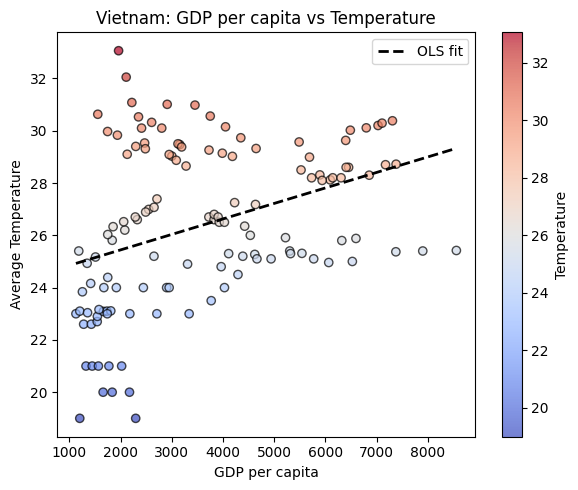

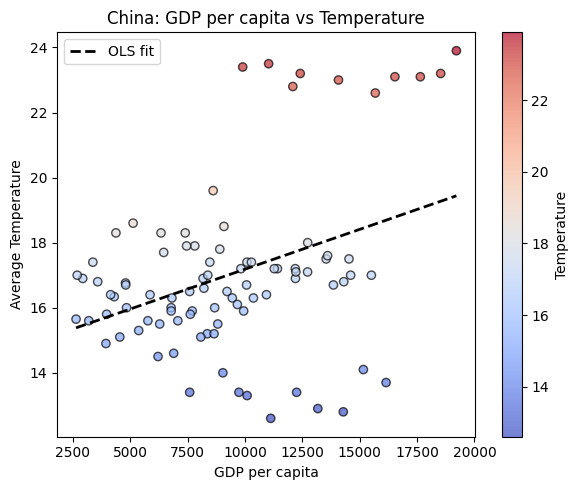

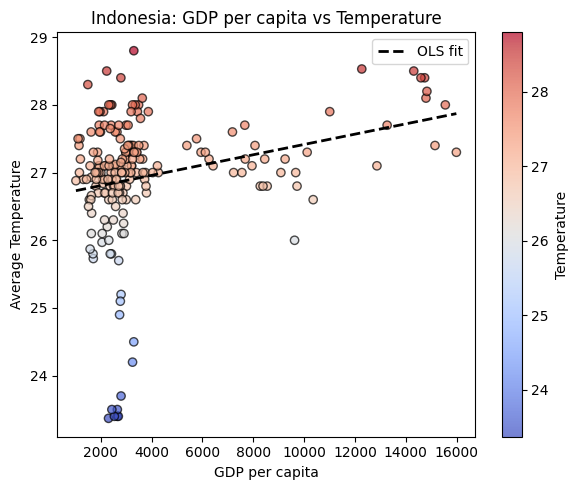

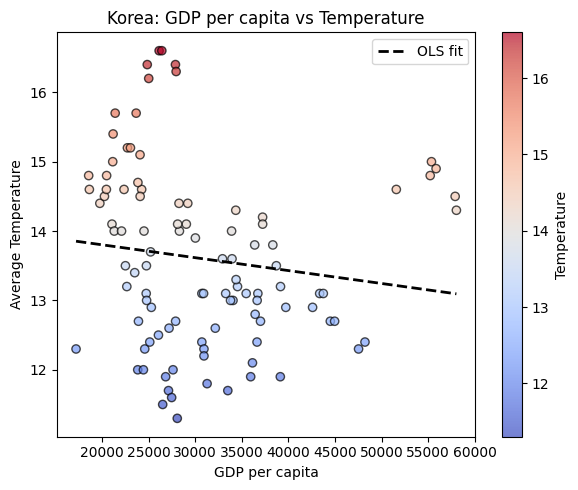

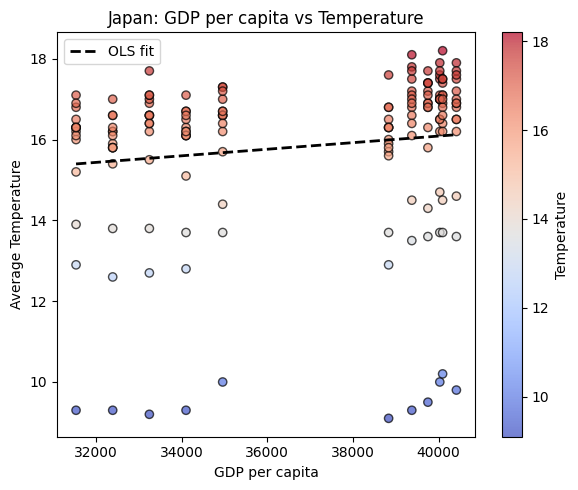

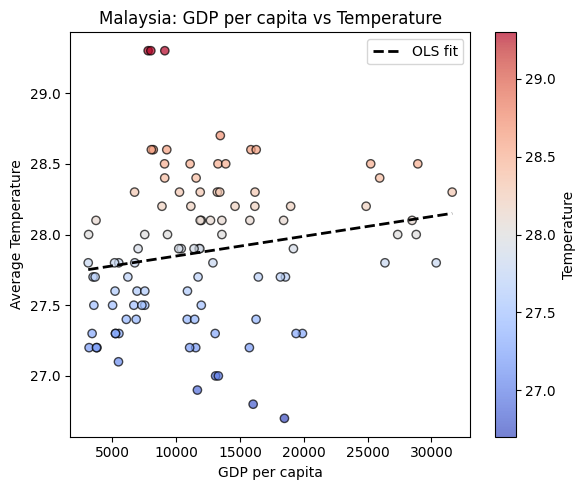

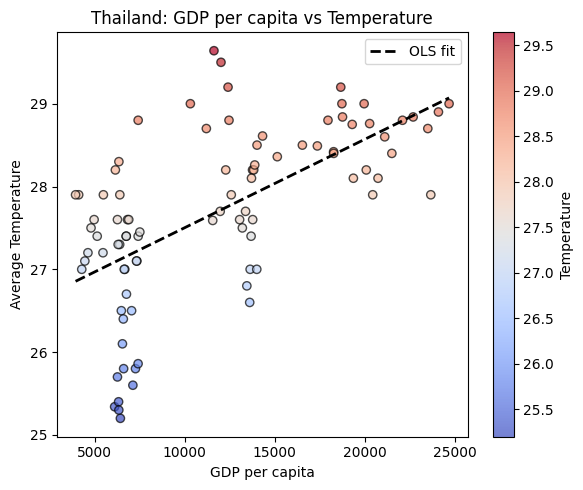

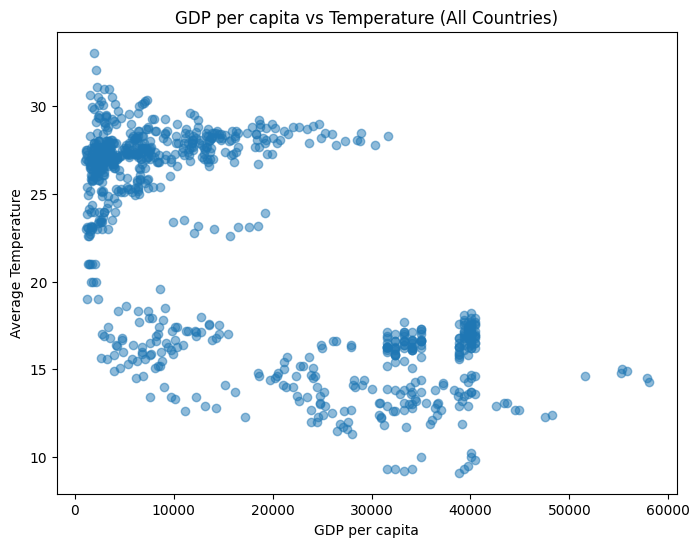

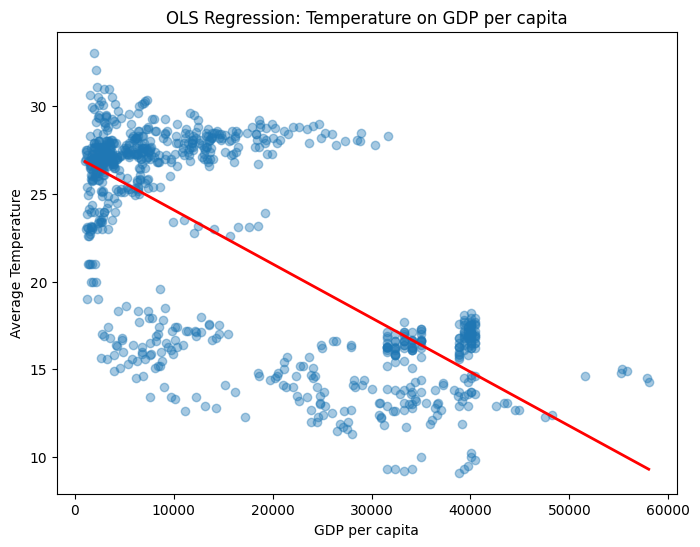

                            OLS Regression Results                            
Dep. Variable:            TEMPERATURE   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     904.7
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          3.16e-137
Time:                        06:52:13   Log-Likelihood:                -2526.6
No. Observations:                 881   AIC:                             5057.
Df Residuals:                     879   BIC:                             5067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1659      0.214    127.084      0.0

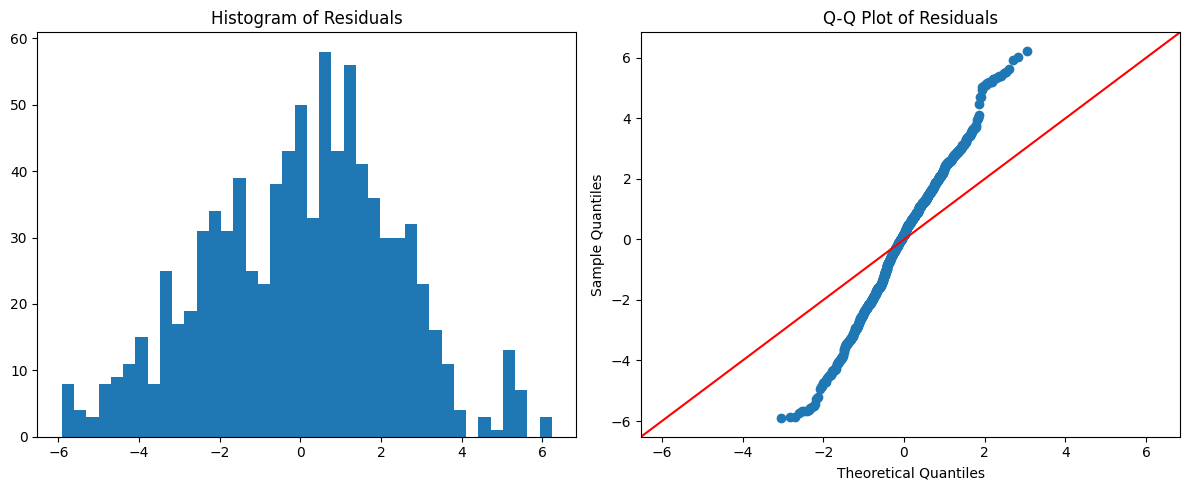

In [1]:
# ==============================
# Mount Google Drive
# ==============================
from google.colab import drive
drive.mount('/content/drive')

# ==============================
# Imports
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ==============================
# Load data
# ==============================
data_dir = "/content/drive/MyDrive/Data/"

files = {
    "Vietnam": "Vietnam_Data_cleaned.csv",
    "China": "China_Data_cleaned.csv",
    "Indonesia": "Indonesia_Data_cleaned.csv",
    "Korea": "Korea_Data_cleaned.csv",
    "Japan": "Japan_Data_cleaned.csv",
    "Malaysia": "Malaysia_Data_cleaned.csv",
    "Thailand": "Thailand_Data_cleaned.csv"
}

dfs = []
for country, file in files.items():
    temp = pd.read_csv(data_dir + file)
    temp["COUNTRY"] = country
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)

# ==============================
# Clean & rename columns (关键一步)
# ==============================
df.columns = df.columns.str.strip()

df = df.rename(columns={
    "GDP PER CAPITA": "GDP_pc",
    "POPULATION DENSITY": "pop_density"
})

# ==============================
# Scatter plot: each country
# (color by temperature + OLS line)
# ==============================
countries = df["COUNTRY"].unique()

for country in countries:
    sub = df[df["COUNTRY"] == country][
        ["GDP_pc", "TEMPERATURE"]
    ].dropna()

    if len(sub) < 5:
        continue

    x = sub["GDP_pc"]
    y = sub["TEMPERATURE"]

    coef = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = coef[0] * x_line + coef[1]

    plt.figure(figsize=(6, 5))

    sc = plt.scatter(
        x, y,
        c=y,
        cmap="coolwarm",
        alpha=0.7,
        edgecolor="k"
    )

    plt.plot(
        x_line, y_line,
        linestyle="--",
        color="black",
        linewidth=2,
        label="OLS fit"
    )

    plt.colorbar(sc, label="Temperature")
    plt.xlabel("GDP per capita")
    plt.ylabel("Average Temperature")
    plt.title(f"{country}: GDP per capita vs Temperature")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================
# Scatter plot: all countries
# ==============================
scatter_df = df[["GDP_pc", "TEMPERATURE"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    scatter_df["GDP_pc"],
    scatter_df["TEMPERATURE"],
    alpha=0.5
)
plt.xlabel("GDP per capita")
plt.ylabel("Average Temperature")
plt.title("GDP per capita vs Temperature (All Countries)")
plt.show()

# ==============================
# Scatter + simple OLS regression line
# ==============================
X = scatter_df["GDP_pc"]
Y = scatter_df["TEMPERATURE"]

X_const = sm.add_constant(X)
model_simple = sm.OLS(Y, X_const).fit()

x_sorted = np.sort(X)
X_plot = sm.add_constant(x_sorted)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.4)
plt.plot(
    x_sorted,
    model_simple.predict(X_plot),
    color="red",
    linewidth=2
)
plt.xlabel("GDP per capita")
plt.ylabel("Average Temperature")
plt.title("OLS Regression: Temperature on GDP per capita")
plt.show()

# ==============================
# OLS Model 1
# ==============================
reg_df1 = df[
    ["TEMPERATURE", "GDP_pc"]
].dropna()

model1 = ols(
    "TEMPERATURE ~ GDP_pc",
    data=reg_df1
).fit()

print(model1.summary())

# ==============================
# OLS Model 2 (with controls)
# ==============================
reg_df2 = df[
    [
        "TEMPERATURE",
        "GDP_pc",
        "pop_density",
        "LATITUDE",
        "ELEVATION"
    ]
].dropna()

model2 = ols(
    "TEMPERATURE ~ GDP_pc + pop_density + LATITUDE + ELEVATION",
    data=reg_df2
).fit()

print(model2.summary())

# ==============================
# Residual diagnostics
# ==============================
residuals = model2.resid

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=40)
plt.title("Histogram of Residuals")

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line="45", ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

